# DATA CLEANING AND HANDLING MISSING VALUES

   enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
2        11561   city_21                   0.624    NaN   
3        33241  city_115                   0.789    NaN   
4          666  city_162                   0.767   Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience                 NaN        Graduate   
4  Has relevent experience       no_enrollment         Masters   

  major_discipline experience company_size  ... StandardHours  \
0             STEM        >20          NaN  ...           NaN   
1             STEM         15        50-99  ...           NaN   
2             STEM          5          NaN  ...      

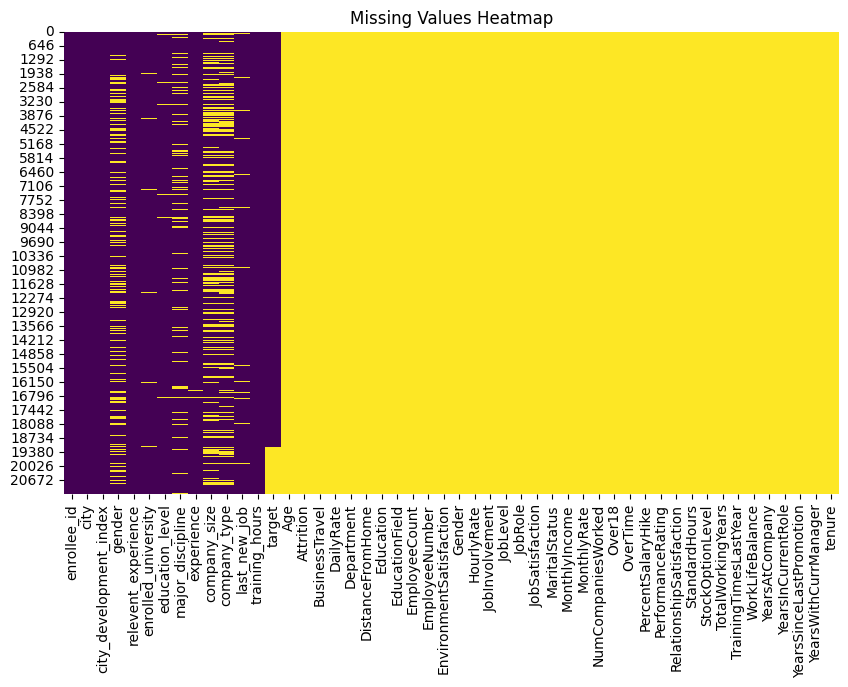

enrollee_id                     0
city                            0
city_development_index          0
gender                          0
relevent_experience             0
enrolled_university             0
education_level                 0
major_discipline                0
experience                      0
company_size                    0
company_type                    0
last_new_job                    0
training_hours                  0
target                       2129
Age                         21287
Attrition                   21287
BusinessTravel              21287
DailyRate                   21287
Department                  21287
DistanceFromHome            21287
Education                   21287
EducationField              21287
EmployeeCount               21287
EmployeeNumber              21287
EnvironmentSatisfaction     21287
Gender                      21287
HourlyRate                  21287
JobInvolvement              21287
JobLevel                    21287
JobRole       

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
data = pd.read_csv('Main_Dataset.csv')

# Display first few rows and inspect the structure
print(data.head())

# Summary statistics
print(data.describe())

# Step 2: Exploratory Data Analysis (EDA)

# Check missing values
print(data.isnull().sum())

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Step 3: Handle Missing Values

# Fill missing values with appropriate methods
# For categorical columns: fill with mode
fill_mode_cols = ['gender', 'enrolled_university', 'education_level', 
                  'major_discipline', 'experience', 'company_size', 
                  'company_type', 'last_new_job']
data[fill_mode_cols] = data[fill_mode_cols].fillna(data.mode().iloc[0])

# Check again for missing values after filling
print(data.isnull().sum())

# Step 4: Prepare Data for Modeling

# Drop unnecessary columns
columns_to_drop = ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 
                   'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 
                   'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 
                   'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 
                   'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 
                   'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 
                   'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 
                   'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 
                   'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 
                   'YearsWithCurrManager', 'tenure']
data.drop(columns=columns_to_drop, inplace=True)

# Encode categorical variables
data = pd.get_dummies(data, drop_first=True)

# Display final cleaned data
print(data.head())

# Now the data is ready for further analysis or modeling


# BASIC EDA

In [6]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv('aug_train.csv')

# Display basic information about the dataset
print(data.info())

# Display the first few rows of the dataset
print(data.head())

# Perform Exploratory Data Analysis (EDA)

## Summary statistics
print(data.describe())

## Handling missing values
# Check missing values
print(data.isnull().sum())

# Define categorical columns with missing values
cat_cols = ['gender', 'enrolled_university', 'education_level', 'major_discipline', 
            'experience', 'company_size', 'company_type', 'last_new_job']

# Impute missing values using SimpleImputer with 'most_frequent' strategy
imputer = SimpleImputer(strategy='most_frequent')
data[cat_cols] = imputer.fit_transform(data[cat_cols])

# Verify if there are any remaining missing values
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

# NEXT STEP

In [7]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Encoding categorical variables and scaling numerical features
categorical_features = ['gender', 'relevent_experience', 'enrolled_university', 'education_level', 
                        'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']
numerical_features = ['city_development_index', 'training_hours']

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Split the data into features and target
X = data.drop(['target', 'enrollee_id', 'city'], axis=1)
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7575678496868476
Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.89      0.85      2880
         1.0       0.52      0.37      0.43       952

    accuracy                           0.76      3832
   macro avg       0.66      0.63      0.64      3832
weighted avg       0.74      0.76      0.74      3832



# HYPERPARAMETER TUNING WITH GRIDSEARCH

In [15]:
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Preprocessing for numerical data
numeric_features = ['city_development_index', 'training_hours']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_features = ['gender', 'relevent_experience', 'enrolled_university',
                        'education_level', 'major_discipline', 'experience', 
                        'company_size', 'company_type', 'last_new_job']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combining the preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Separate features and target
X = data.drop(['target', 'enrollee_id', 'city'], axis=1)
y = data['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model pipeline
pipeline = imbpipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define the parameter grid for Grid Search
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

# Set up the Grid Search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Train the model using Grid Search
grid_search.fit(X_train, y_train)

# Print the best parameters found by Grid Search
print("Best parameters found: ", grid_search.best_params_)

# Make predictions with the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 108 candidates, totalling 540 fits


ValueError: 
All the 540 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\deepi\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\_indexing.py", line 338, in _get_column_indices
    all_columns = X.columns
                  ^^^^^^^^^
AttributeError: 'csr_matrix' object has no attribute 'columns'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\deepi\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\deepi\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\deepi\AppData\Roaming\Python\Python312\site-packages\sklearn\pipeline.py", line 472, in fit
    Xt = self._fit(X, y, routed_params)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\deepi\AppData\Roaming\Python\Python312\site-packages\sklearn\pipeline.py", line 409, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\deepi\AppData\Roaming\Python\Python312\site-packages\joblib\memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\deepi\AppData\Roaming\Python\Python312\site-packages\sklearn\pipeline.py", line 1329, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\deepi\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\_set_output.py", line 313, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\deepi\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\deepi\AppData\Roaming\Python\Python312\site-packages\sklearn\compose\_column_transformer.py", line 969, in fit_transform
    self._validate_column_callables(X)
  File "C:\Users\deepi\AppData\Roaming\Python\Python312\site-packages\sklearn\compose\_column_transformer.py", line 536, in _validate_column_callables
    transformer_to_input_indices[name] = _get_column_indices(X, columns)
                                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\deepi\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\_indexing.py", line 340, in _get_column_indices
    raise ValueError(
ValueError: Specifying the columns using strings is only supported for dataframes.


# HANDLING IMBALANCED DATA (SMOTE)

In [14]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Preprocessing for numerical data
numeric_features = ['city_development_index', 'training_hours']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_features = ['gender', 'relevent_experience', 'enrolled_university',
                        'education_level', 'major_discipline', 'experience', 
                        'company_size', 'company_type', 'last_new_job']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combining the preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Separate features and target
X = data.drop(['target', 'enrollee_id', 'city'], axis=1)
y = data['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply the preprocessor to the training data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Apply SMOTE to the processed training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_processed, y_train)

# Define the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train_res, y_train_res)

# Make predictions
y_pred = model.predict(X_test_processed)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7533924843423799
Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.86      0.84      2880
         1.0       0.50      0.43      0.47       952

    accuracy                           0.75      3832
   macro avg       0.66      0.65      0.65      3832
weighted avg       0.74      0.75      0.75      3832



# XGBOOST

In [12]:
from xgboost import XGBClassifier

# Define the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
])

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7753131524008351
Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.89      0.86      2880
         1.0       0.56      0.42      0.48       952

    accuracy                           0.78      3832
   macro avg       0.69      0.66      0.67      3832
weighted avg       0.76      0.78      0.76      3832



c:\Users\deepi\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:51:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


# ENSEMBLE METHODS

In [10]:
from xgboost import XGBClassifier

# Define the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
])

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7753131524008351
Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.89      0.86      2880
         1.0       0.56      0.42      0.48       952

    accuracy                           0.78      3832
   macro avg       0.69      0.66      0.67      3832
weighted avg       0.76      0.78      0.76      3832



c:\Users\deepi\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:51:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
